In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linregress
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

query_url = (f"{url}{weather_api_key}")

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = query_url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | azimur
City not found. Skipping...
Processing Record 2 of Set 1 | bereda
Processing Record 3 of Set 1 | maua
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | hambantota
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | sibolga
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | fairbanks
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | tidore
City not found. Skipping...
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | san jose
Processing Record 21 of Set 1 | bluff
Processi

Processing Record 37 of Set 4 | gamba
Processing Record 38 of Set 4 | bhag
Processing Record 39 of Set 4 | tenenkou
Processing Record 40 of Set 4 | camargo
Processing Record 41 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | claveria
Processing Record 44 of Set 4 | parana
Processing Record 45 of Set 4 | aketi
Processing Record 46 of Set 4 | srednekolymsk
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | axim
Processing Record 49 of Set 4 | takoradi
Processing Record 50 of Set 4 | roald
Processing Record 1 of Set 5 | halalo
City not found. Skipping...
Processing Record 2 of Set 5 | carlisle
Processing Record 3 of Set 5 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 4 of Set 5 | lasa
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | marathon
Processing Record 7 of Set 5 | svecha
Processing Record 8 of Set 5 | petrolina
Processing Record 9 of Set 5 | hami
Processing

Processing Record 29 of Set 8 | arlit
Processing Record 30 of Set 8 | otradnoye
Processing Record 31 of Set 8 | qasigiannguit
Processing Record 32 of Set 8 | nantucket
Processing Record 33 of Set 8 | zarautz
Processing Record 34 of Set 8 | tabuk
Processing Record 35 of Set 8 | constantine
Processing Record 36 of Set 8 | port-cartier
Processing Record 37 of Set 8 | linxia
Processing Record 38 of Set 8 | wladyslawowo
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | georgetown
Processing Record 41 of Set 8 | ust-nera
Processing Record 42 of Set 8 | plettenberg bay
Processing Record 43 of Set 8 | lambari
Processing Record 44 of Set 8 | utiroa
City not found. Skipping...
Processing Record 45 of Set 8 | solhan
Processing Record 46 of Set 8 | winnemucca
Processing Record 47 of Set 8 | gizo
Processing Record 48 of Set 8 | superior
Processing Record 49 of Set 8 | formosa do rio preto
Processing Record 50 of Set 8 | ponta do sol
Processing Record 1 of Set 9 | holland
Pro

Processing Record 17 of Set 12 | marawi
Processing Record 18 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 19 of Set 12 | arkhangelsk
Processing Record 20 of Set 12 | serenje
Processing Record 21 of Set 12 | longyan
Processing Record 22 of Set 12 | bagdarin
Processing Record 23 of Set 12 | maningrida
Processing Record 24 of Set 12 | maragogi
Processing Record 25 of Set 12 | iqaluit
Processing Record 26 of Set 12 | prince rupert
Processing Record 27 of Set 12 | bukama
Processing Record 28 of Set 12 | cuenca
Processing Record 29 of Set 12 | ballina
Processing Record 30 of Set 12 | garowe
Processing Record 31 of Set 12 | argentan
Processing Record 32 of Set 12 | inuvik
Processing Record 33 of Set 12 | sabha
Processing Record 34 of Set 12 | arcachon
Processing Record 35 of Set 12 | cao bang
Processing Record 36 of Set 12 | wahiawa
Processing Record 37 of Set 12 | marzuq
Processing Record 38 of Set 12 | gobabis
Processing Record 39 of Set 12 | shchelyayur
City not fo

In [17]:
len(city_data)

541

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bereda,43.2686,-7.5406,51.01,100,5,2.42,ES,2021-10-28 00:28:09
1,Maua,-23.6678,-46.4614,68.36,97,100,4.21,BR,2021-10-28 00:28:10
2,Saint-Philippe,-21.3585,55.7679,69.39,78,29,5.79,RE,2021-10-28 00:28:10
3,Hambantota,6.1241,81.1185,75.54,100,100,4.61,LK,2021-10-28 00:28:10
4,Rikitea,-23.1203,-134.9692,74.55,74,34,3.38,PF,2021-10-28 00:28:11
5,Jamestown,42.0970,-79.2353,47.84,92,1,1.99,US,2021-10-28 00:28:06
6,Albany,42.6001,-73.9662,51.80,73,100,5.57,US,2021-10-28 00:28:11
7,Bredasdorp,-34.5322,20.0403,61.92,94,77,4.61,ZA,2021-10-28 00:25:03
8,Ushuaia,-54.8000,-68.3000,47.86,53,20,12.66,AR,2021-10-28 00:23:25
9,Sibolga,1.7427,98.7792,76.98,84,89,2.15,ID,2021-10-28 00:28:12


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bereda,ES,2021-10-28 00:28:09,43.2686,-7.5406,51.01,100,5,2.42
1,Maua,BR,2021-10-28 00:28:10,-23.6678,-46.4614,68.36,97,100,4.21
2,Saint-Philippe,RE,2021-10-28 00:28:10,-21.3585,55.7679,69.39,78,29,5.79
3,Hambantota,LK,2021-10-28 00:28:10,6.1241,81.1185,75.54,100,100,4.61
4,Rikitea,PF,2021-10-28 00:28:11,-23.1203,-134.9692,74.55,74,34,3.38
5,Jamestown,US,2021-10-28 00:28:06,42.0970,-79.2353,47.84,92,1,1.99
6,Albany,US,2021-10-28 00:28:11,42.6001,-73.9662,51.80,73,100,5.57
7,Bredasdorp,ZA,2021-10-28 00:25:03,-34.5322,20.0403,61.92,94,77,4.61
8,Ushuaia,AR,2021-10-28 00:23:25,-54.8000,-68.3000,47.86,53,20,12.66
9,Sibolga,ID,2021-10-28 00:28:12,1.7427,98.7792,76.98,84,89,2.15


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
weather_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(weather_data_to_load)

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

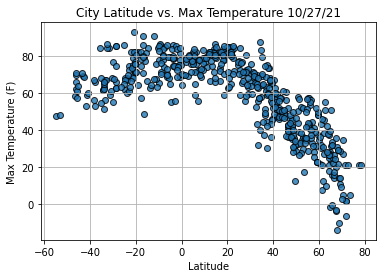

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

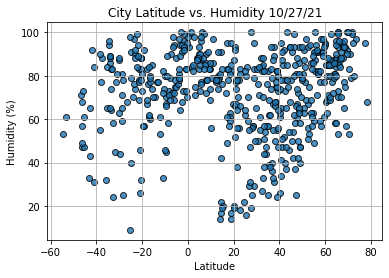

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

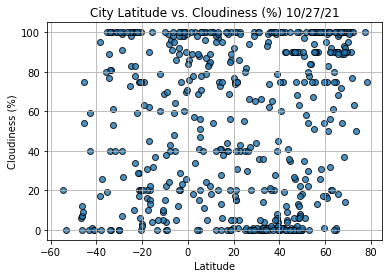

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

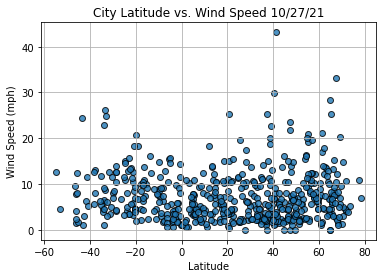

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                    Fairbanks
Country                        US
Date          2021-10-28 00:28:13
Lat                       64.8378
Lng                     -147.7164
Max Temp                    28.36
Humidity                       88
Cloudiness                     90
Wind Speed                    0.0
Name: 13, dtype: object

In [43]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

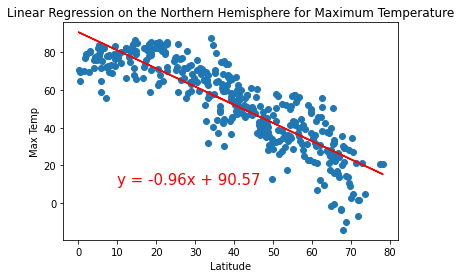

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Linear Regression on the Northern Hemisphere for Maximum Temperature"
y_label = "Max Temp"
text_coordinates = (10,10)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

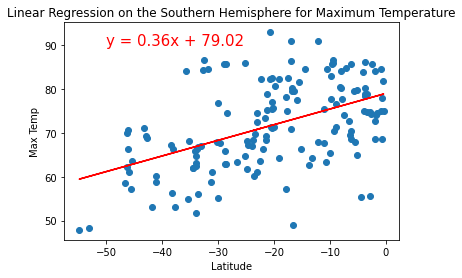

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Linear Regression on the Southern Hemisphere for Maximum Temperature"
y_label = "Max Temp"
text_coordinates = (-50,90)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

In [53]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(r_value)

0.49354790590578285


In [54]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(r_value)

-0.8645077272545462


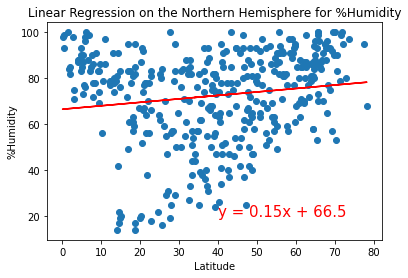

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Linear Regression on the Northern Hemisphere for %Humidity"
y_label = "%Humidity"
text_coordinates = (40,20)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

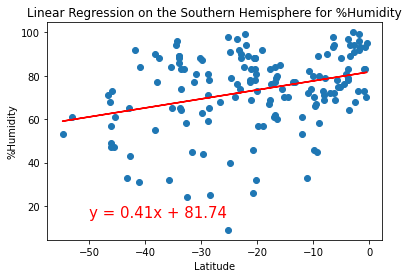

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Linear Regression on the Southern Hemisphere for %Humidity"
y_label = "%Humidity"
text_coordinates = (-50,15)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

In [62]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print(r_value)

0.14855488560743804


In [63]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print(r_value)

0.31380042408842895


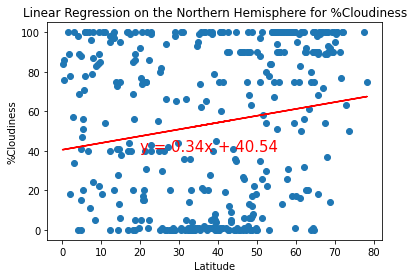

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Linear Regression on the Northern Hemisphere for %Cloudiness"
y_label = "%Cloudiness"
text_coordinates = (20,40)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

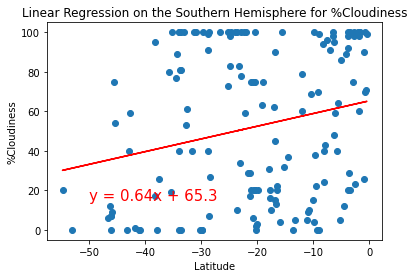

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Linear Regression on the Southern Hemisphere for %Cloudiness"
y_label = "%Cloudiness"
text_coordinates = (-50,15)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

In [67]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print(r_value)

0.22918675271574823


In [68]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print(r_value)

0.17215897226131427


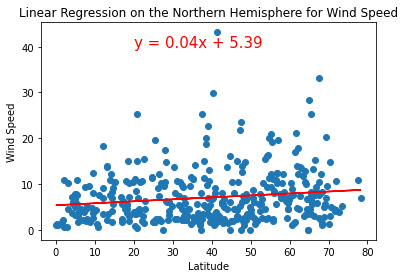

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Linear Regression on the Northern Hemisphere for Wind Speed"
y_label = "Wind Speed"
text_coordinates = (20,40)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

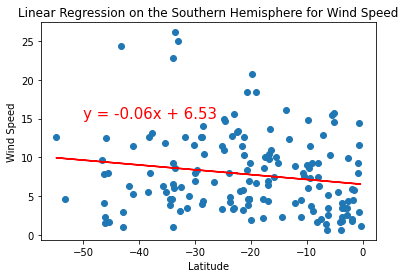

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Linear Regression on the Southern Hemisphere for Wind Speed"
y_label = "Wind Speed"
text_coordinates = (-50,15)
# Call the function.
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

In [71]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(r_value)

0.1500441389205183


In [72]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(r_value)

-0.1659497688068881
